Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

#from grader import Grader

In [2]:
cd

/home/adolpho


In [3]:
DATA_FOLDER = 'Programas/How_to_win_data_science_competition/1_semana/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
#grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
# YOUR CODE GOES HERE
print(transactions.shape)
transactions.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
print(items.shape)
items.head(20)

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [7]:
print(item_categories.shape)
item_categories.head(20)

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [8]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
import datetime 

#work with datetime
transactions['date'] = pd.to_datetime(transactions['date'],format="%d.%m.%Y")

#filtering
include_14_9 = transactions[(transactions['date'].dt.year == int(2014)) & (transactions['date'].dt.month == int(9))]
include_14_9['revenue'] = include_14_9.item_price*include_14_9.item_cnt_day
max_revenue = include_14_9.groupby('shop_id')['revenue'].sum().max()
print(max_revenue)
#grader.submit_tag('max_revenue', max_revenue)

7982852.199999957


/tmp/ipykernel_10540/402762532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  include_14_9['revenue'] = include_14_9.item_price*include_14_9.item_cnt_day


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [10]:
#The order if you merge and filter can change the answer that we get

#Merging tables
i_n =items.drop(columns=['item_name'])
include = pd.merge(transactions,i_n, how='inner', on='item_id')
#Filtering
include_14 = include[include['date'].dt.year == int(2014)]
include_14_summer = include_14[(include_14['date'].dt.month > int(5)) & (include_14['date'].dt.month < int(9))]
#Creat revenue
include_14_summer['revenue'] = include_14_summer.item_price*include_14_summer.item_cnt_day
#calculating by group
sort = include_14_summer.groupby('item_category_id')['revenue'].sum()
category_id_with_max_revenue = sort.index[(sort.argmax())]
print(category_id_with_max_revenue)
#grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

20


/tmp/ipykernel_10540/647001541.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  include_14_summer['revenue'] = include_14_summer.item_price*include_14_summer.item_cnt_day


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [11]:
# YOUR CODE GOES HERE

list_items = transactions['item_id'].unique().tolist()
num_items_constant_price = 0
for item in list_items:
    new_table  = transactions[transactions['item_id'] == item]
    new_table = new_table['item_price'].unique()
    if len(new_table)==1:
        num_items_constant_price+=1
        
print(num_items_constant_price)
#grader.submit_tag('num_items_constant_price', num_items_constant_price)

5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

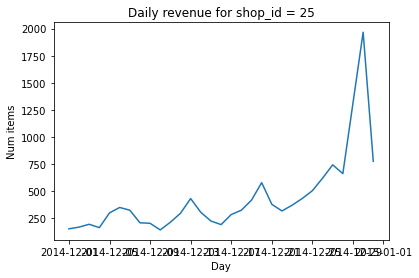

117167.70229885059


In [12]:
shop_id = 25
 
include_14 = include[include['date'].dt.year == int(2014)]
include_14_12 = include_14[include_14['date'].dt.month == int(12)]
include_14_12  = include_14_12[include_14_12['shop_id']== 25]
include_14_12  = include_14_12[include_14_12['item_cnt_day']!= 0]
include_14_12 = include_14_12.sort_values(by="date")
days = include_14_12['date'].unique()
total_num_items_sold = include_14_12.groupby('date')['item_cnt_day'].sum()

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold,ddof=1)
print(total_num_items_sold_var)
#grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [13]:
STUDENT_EMAIL = 'adolphoafsantos@usp.br'
STUDENT_TOKEN = 'ibAV0HjyEmtw5MOy'
#grader.status()

In [14]:
#grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)